### 시도별 화재 발생 현황

- 화재 발생이 사망에 미치는 영향
- 지자체별로 각건당 재산피해의 액수


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

current_font_list= matplotlib.rcParams['font.family']

font_path ="C:\Windows\Fonts\HMFMMUEX.TTC"
kfont = matplotlib.font_manager.FontProperties(fname= font_path).get_name()
#print(kfont)

matplotlib.rcParams['font.family'] = [kfont] + current_font_list

pd_data = pd.read_csv('시도별_화재발생_현황_총괄__20230307153433.csv', encoding = 'cp949', header=0)

#pd_data.columns = ['시도별', '시점', '사망', '부상', '재산피해', '부동산', '동산', '이재가구수', '이재민수']
pd_data.head()

,행정구역별,시점,건수 (건),사망 (명),부상 (명),재산피해(계) (천원),부동산 (천원),동산 (천원),이재가구수 (가구),이재민수 (명)
0,전국,2010,41863,304,1588,266776332,117808118,148968214,1183,2623
1,전국,2011,43875,263,1599,256547614,113257928,143289686,1158,2417
2,전국,2012,43249,267,1955,289493719,127500018,161993701,1062,2254
3,전국,2013,40932,307,1877,434462330,178812680,255649650,1354,2330
4,전국,2014,42135,325,1856,405356513,168824616,236531897,1178,2374


행정구역별           object
시점               int64
건수 (건)           int64
사망 (명)           int64
부상 (명)           int64
재산피해(계) (천원)     int64
부동산 (천원)         int64
동산 (천원)          int64
이재가구수 (가구)       int64
이재민수 (명)         int64
dtype: object
False    214
Name: 사망 (명), dtype: int64


array([304, 263, 267, 307, 325, 253, 306, 345, 369, 285, 365, 276,  42,
        29,  31,  36,  27,  40,  37,  53,  19,  21,  26,  22,  17,  14,
         9,  13,  16,  12,   7,  11,   8,  18,   5,  15,  10,   1,   3,
         4,   6,   2,   0,  62,  67,  61,  54,  77,  63,  70,  78,  47,
       114,  66,  20,  24,  41,  33,  30,  43,  23,  28,  56], dtype=int64)

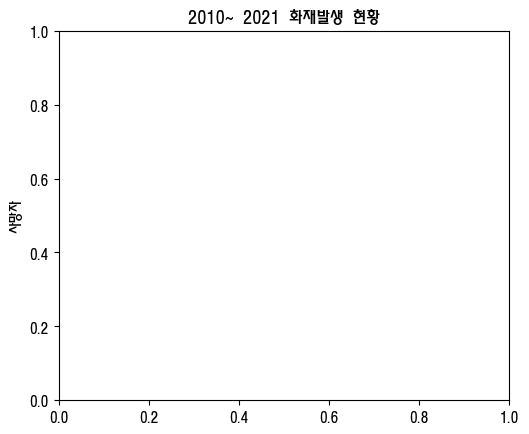

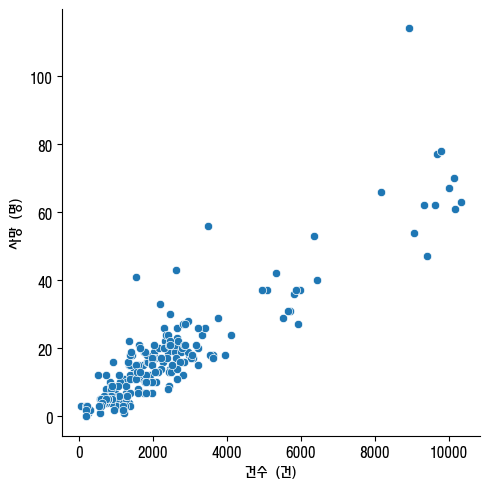

In [4]:
fig=plt.figure(figsize=(6.4*2, 4.8))
fire_life= fig.add_subplot(1,2,1)
line_params = ['ro', 'bv:']
fire_life.set(title = '2010~ 2021 화재발생 현황', ylabel='사망자')


pd_data_nc = pd_data[pd_data['행정구역별'] !='전국']
pd_data_c = pd_data[pd_data['행정구역별'] == '전국']
#print(pd_data_c)


sns.relplot(data=pd_data_nc, x='건수 (건)', y='사망 (명)')
print(pd_data_nc.dtypes)

na_filter = pd_data['사망 (명)'].isna()
print(na_filter.value_counts())
pd_data.loc[na_filter, '사망 (명)'] = 0



pd_data['사망 (명)'] = pd_data['사망 (명)'].replace('-', 0)
pd_data['사망 (명)'] = pd_data['사망 (명)'].astype('int64')

pd_data['사망 (명)'].unique()



C:\Users\ITPS\AppData\Local\Temp\ipykernel_13268\887437058.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df1 = pd_data_nc.pivot('행정구역별', '시점', '사망 (명)')


<AxesSubplot: xlabel='시점', ylabel='행정구역별'>

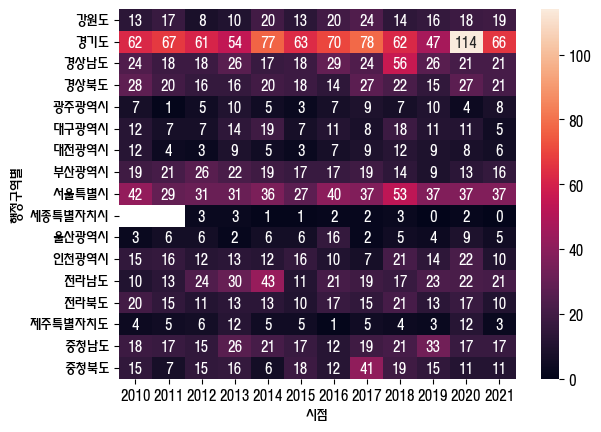

In [5]:
df1 = pd_data_nc.pivot('행정구역별', '시점', '사망 (명)')
sns.heatmap(df1, annot=True, fmt='.0f')